# Introduction to Graph Science

## Lab 04 : Construct a network of text documents

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/GML_May23_codes/codes/02_Graph_Science'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd

In [2]:
# Load libraries

# Math
import numpy as np

# Visualization 
%matplotlib inline
#%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

# Print output of LFR code
import subprocess

# Sparse matrix
import scipy.sparse
import scipy.sparse.linalg

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Import data
import scipy.io

# Import functions in lib folder
import sys
sys.path.insert(0, 'lib/')
%load_ext autoreload
%autoreload 2
from lib.utils import graph_laplacian
from lib.utils import compute_ncut
from lib.utils import reindex_W_with_classes
from lib.utils import nldr_visualization
from lib.utils import construct_knn_graph
from lib.utils import compute_pca

# Import distance function
import sklearn.metrics.pairwise

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load 10 classes of 4,000 text documents
mat = scipy.io.loadmat('datasets/20news_5classes_raw_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt'] - 1; Cgt = Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,d,nc)

2000 7939 5


In [4]:
# Compute the k-NN graph with L2/Euclidean distance
W_euclidean = construct_knn_graph(X,10,'euclidean')
#print(W_euclidean)

k-NN graph with euclidean distance


In [5]:
Cncut,acc = compute_ncut(W_euclidean, Cgt, nc)
print(acc)

20.349999999999998


In [6]:
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_euclidean,Cgt)
[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_euclidean,Cncut)

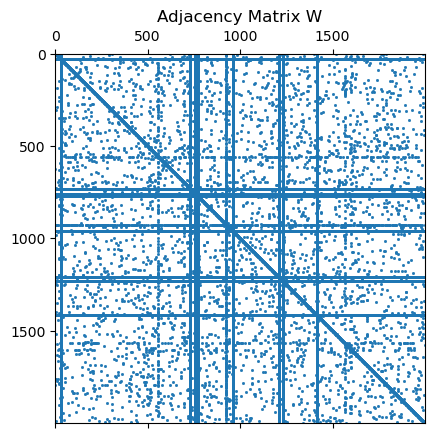

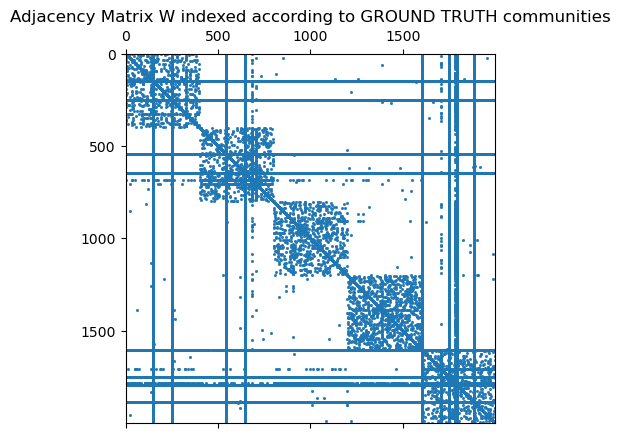

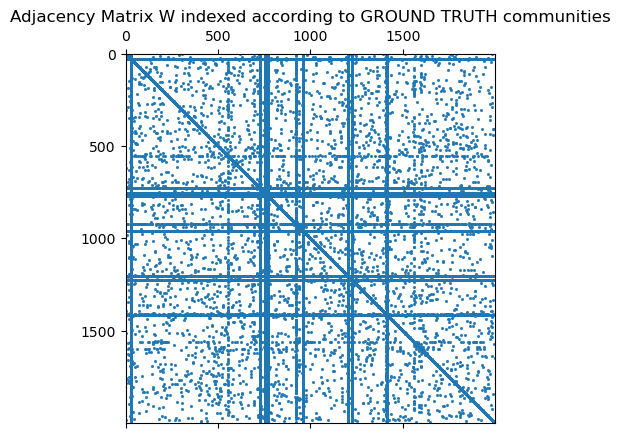

In [7]:
plt.figure(80)
plt.spy(W_euclidean,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W')
plt.show()

plt.figure(81)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W indexed according to GROUND TRUTH communities')
plt.show()

plt.figure(82)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W indexed according to GROUND TRUTH communities')
plt.show()

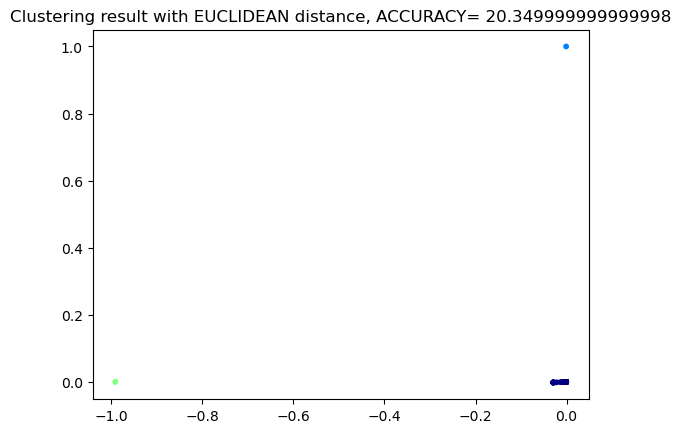

<Figure size 640x480 with 0 Axes>

In [8]:
[X,Y,Z] = nldr_visualization(W_euclidean)

plt.figure(85)
size_vertex_plot = 10
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Clustering result with EUCLIDEAN distance, ACCURACY= '+ str(acc))
plt.show()

# 3D Visualization
fig = pylab.figure(86)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Cncut, color=pyplot.jet())
pyplot.show()

In [9]:
X = mat['X']

In [10]:
# Compute the k-NN graph with Cosine distance
W_cosine = construct_knn_graph(X,10,'cosine')

k-NN graph with cosine distance


In [11]:
Cncut,acc = compute_ncut(W_cosine, Cgt, nc)
print(acc)

74.25


In [12]:
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_cosine,Cgt)
[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_cosine,Cncut)

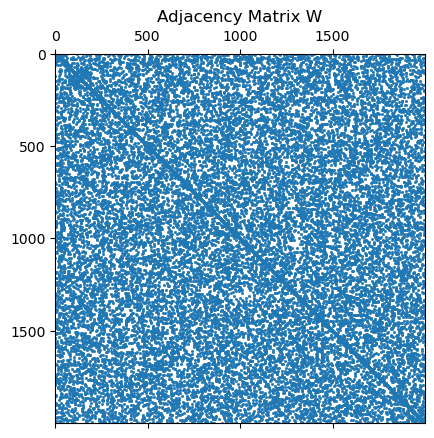

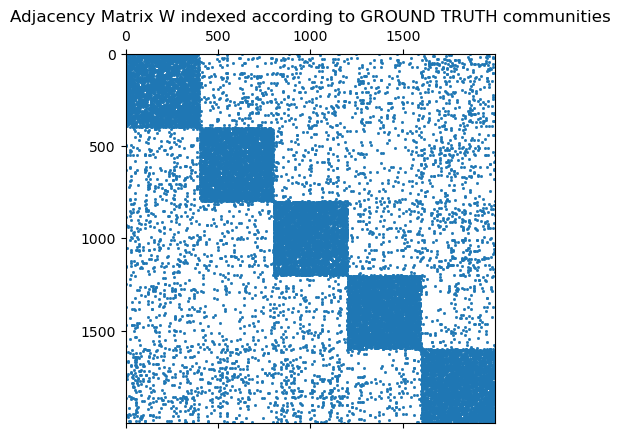

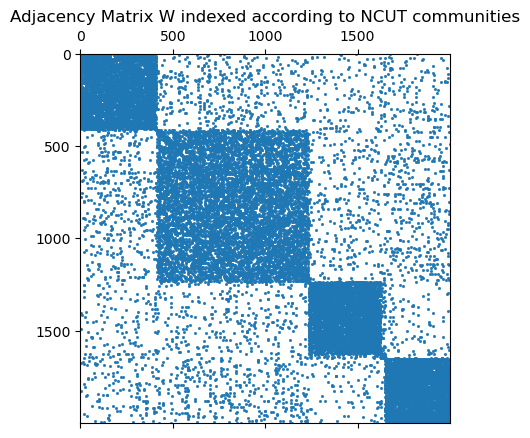

In [13]:
plt.figure(90)
plt.spy(W_cosine,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W')
plt.show()

plt.figure(91)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W indexed according to GROUND TRUTH communities')
plt.show()

plt.figure(92)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix W indexed according to NCUT communities')
plt.show()

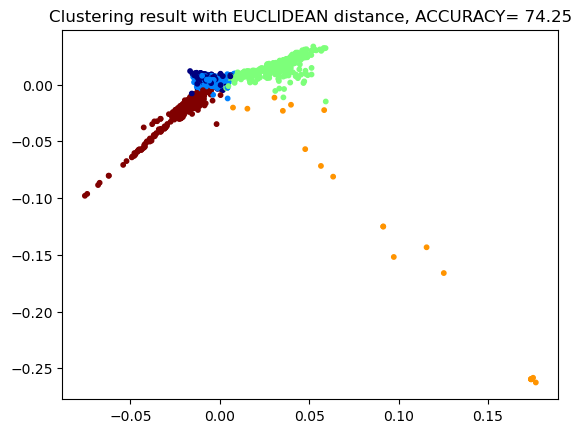

<Figure size 640x480 with 0 Axes>

In [14]:
[X,Y,Z] = nldr_visualization(W_cosine)

plt.figure(95)
size_vertex_plot = 10
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Clustering result with EUCLIDEAN distance, ACCURACY= '+ str(acc))
plt.show()

# 3D Visualization
fig = pylab.figure(96)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Cncut)
pyplot.show()